In [6]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
# import all_insiders_combined as a pd DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [50]:
# Load the data
data_types = {
    'Name and Address': str,
    'Principal occupation if other than with Bank Holding Company': str,
    'Title and Position with Bank Holding Company': str,
    'Title and Position with Subsidiaries': str,
    'Title and Position with Other Businesses': str,
    'Percentage of Voting Shares in Bank Holding Company': str,
    'Percentage of Voting Shares in Subsidiaries': str,
    'List names of other companies if 25% or more of voting securities are held': str,
    'Bank Name': str,
    'table presence': str,
    'Bank_PDF-Name': str,
    'Year': str,
}

#only load the columns that are needed (listed in data_types)
columns_to_load = list(data_types.keys())

# Load the CSV file with specified data types
df = pd.read_csv('/Users/nashlaturcios/Desktop/nash-fed-data/all_insiders_combined.csv', 
  dtype=data_types,
  usecols=columns_to_load)


In [51]:
# Replace 'Bank Name' with the part from 'Bank_PDF-Name' that comes before '_Y-6'
df['Bank Name'] = df['Bank_PDF-Name'].str.extract(r'^(.*?)_Y-6')
df['Year'] = df['Bank_PDF-Name'].str.extract(r'_Y-6_(\d{4})')
df


,Name and Address,Principal occupation if other than with Bank Holding Company,Title and Position with Bank Holding Company,Title and Position with Subsidiaries,Title and Position with Other Businesses,Percentage of Voting Shares in Bank Holding Company,Percentage of Voting Shares in Subsidiaries,List names of other companies if 25% or more of voting securities are held,Bank Name,table presence,Bank_PDF-Name,Year
0,"Douglass M Eberhardt II (1) Stockton, CA",NaN,"President, CEO and Chairman","President, CEO and Chairman",Member San Joaquin County Busines Council,19.99 %,NaN,NaN,1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2020-12...,2020
1,"Timothy J Hachman Stockton, CA",Retired Attorney at Law,Director,"Director, Bank of Stockton","Timothy J Hachman, Attorney at Law, Owner Dire...",0.11 %,NaN,"Timothy J Hachman, Attorney at Law, 100%",1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2020-12...,2020
2,"Gregory Bensch Stockton, Ca","Medical Doctor, Allergy Immunology Asthma Medi...",Director,"Director, Bank of Stockton",NaN,NaN,NaN,"Gregory Bensch MD, Inc 100% Bensch & Bensch Pr...",1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2020-12...,2020
3,"Thomas H Shaffer Stockton, CA",NaN,Director,Director Bank of Stockton,NaN,0.24 %,NaN,NaN,1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2020-12...,2020
4,"John F. Denton Stockton, CA",NaN,Chief Financial Officer,Chief Financial Officer,NaN,0.16 %,NaN,NaN,1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2020-12...,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
39931,"Robert SchwarzSilver Lake, KS",Certified FinancialPlanner,Director,NaN,NaN,87.67 (1.47%),NaN,{'Name': 'Cobier Capital Management Schwarz Br...,"Republic Bancorp, Inc.",both,"Republic Bancorp, Inc._Y-6_2020-12-31_English_...",2020
39932,"Keith AndersonBelleville, KS",Bank Branch Manager,Secretary/Director,Senior Vice President,NaN,158.07 (2.66%),NaN,{'Name': 'Three Fires Cattle Co Jakutio inc. A...,"Republic Bancorp, Inc.",both,"Republic Bancorp, Inc._Y-6_2020-12-31_English_...",2020
39933,"John CareyTopeka, KS",Contractor,Director,NaN,NaN,292.23 (4.91%),NaN,{'Name': 'Modern Home Sale Midwest Homes S & J...,"Republic Bancorp, Inc.",both,"Republic Bancorp, Inc._Y-6_2020-12-31_English_...",2020
39934,"Clifton Padgett Junction City, KS",Retired,Director,NaN,NaN,2.00 (.0003%),NaN,"{'Name': 'None', 'Shares': '-', 'Percentage of...","Republic Bancorp, Inc.",both,"Republic Bancorp, Inc._Y-6_2020-12-31_English_...",2020


In [52]:
# Convert 'Year' to int, handling 'Unknown' as NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # NaN for 'Unknown'

In [53]:
# Remove the percentage sign and convert percentage columns to numeric
percentage_columns = [
    'Percentage of Voting Shares in Bank Holding Company',
    'Percentage of Voting Shares in Subsidiaries'
]

# Filter percentage columns to be correct

for col in percentage_columns:
    df[col] = (
        df[col]
        .astype(str)
        .str.extract(r'(\d+(?:\.\d+)?)\s*%')  # number followed by optional space then %
        .astype(float)
        .fillna(0.0)
    )


In [54]:
# Convert any percentage of voting shares that are above 100 to 100

for col in percentage_columns:
    df[col] = df[col].clip(upper=100.0)

In [55]:
df


,Name and Address,Principal occupation if other than with Bank Holding Company,Title and Position with Bank Holding Company,Title and Position with Subsidiaries,Title and Position with Other Businesses,Percentage of Voting Shares in Bank Holding Company,Percentage of Voting Shares in Subsidiaries,List names of other companies if 25% or more of voting securities are held,Bank Name,table presence,Bank_PDF-Name,Year
0,"Douglass M Eberhardt II (1) Stockton, CA",NaN,"President, CEO and Chairman","President, CEO and Chairman",Member San Joaquin County Busines Council,19.99,0.0,NaN,1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2020-12...,2020
1,"Timothy J Hachman Stockton, CA",Retired Attorney at Law,Director,"Director, Bank of Stockton","Timothy J Hachman, Attorney at Law, Owner Dire...",0.11,0.0,"Timothy J Hachman, Attorney at Law, 100%",1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2020-12...,2020
2,"Gregory Bensch Stockton, Ca","Medical Doctor, Allergy Immunology Asthma Medi...",Director,"Director, Bank of Stockton",NaN,0.00,0.0,"Gregory Bensch MD, Inc 100% Bensch & Bensch Pr...",1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2020-12...,2020
3,"Thomas H Shaffer Stockton, CA",NaN,Director,Director Bank of Stockton,NaN,0.24,0.0,NaN,1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2020-12...,2020
4,"John F. Denton Stockton, CA",NaN,Chief Financial Officer,Chief Financial Officer,NaN,0.16,0.0,NaN,1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2020-12...,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
39931,"Robert SchwarzSilver Lake, KS",Certified FinancialPlanner,Director,NaN,NaN,1.47,0.0,{'Name': 'Cobier Capital Management Schwarz Br...,"Republic Bancorp, Inc.",both,"Republic Bancorp, Inc._Y-6_2020-12-31_English_...",2020
39932,"Keith AndersonBelleville, KS",Bank Branch Manager,Secretary/Director,Senior Vice President,NaN,2.66,0.0,{'Name': 'Three Fires Cattle Co Jakutio inc. A...,"Republic Bancorp, Inc.",both,"Republic Bancorp, Inc._Y-6_2020-12-31_English_...",2020
39933,"John CareyTopeka, KS",Contractor,Director,NaN,NaN,4.91,0.0,{'Name': 'Modern Home Sale Midwest Homes S & J...,"Republic Bancorp, Inc.",both,"Republic Bancorp, Inc._Y-6_2020-12-31_English_...",2020
39934,"Clifton Padgett Junction City, KS",Retired,Director,NaN,NaN,3.00,0.0,"{'Name': 'None', 'Shares': '-', 'Percentage of...","Republic Bancorp, Inc.",both,"Republic Bancorp, Inc._Y-6_2020-12-31_English_...",2020


In [56]:
# Print max percentage of voting shares in bank holding company
max_percentage = df['Percentage of Voting Shares in Bank Holding Company'].max()
print(f'Max Percentage of Voting Shares in Bank Holding Company: {max_percentage:.2f}%')

Max Percentage of Voting Shares in Bank Holding Company: 100.00%


In [57]:
# Create groups for each bank_name that shares the same year
grouped = df.groupby(['Bank Name', 'Year'])

In [58]:
# Add up all the percentages for each grouped item
def sum_percentages(group):
    return group[percentage_columns].sum().to_frame().T
# Apply the function to each group and reset index
summed_df = grouped.apply(sum_percentages).reset_index()

/var/folders/vx/xg36vz154jdcdqrx3fvxm47c0000gn/T/ipykernel_37122/202517244.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summed_df = grouped.apply(sum_percentages).reset_index()


In [59]:
# If the percentage of voting shares in bank holding company is greater than 100, set it to 100
summed_df['Percentage of Voting Shares in Bank Holding Company'] = summed_df['Percentage of Voting Shares in Bank Holding Company'].clip(upper=100.0)


In [60]:
# Print the maximum percentage of voting shares in bank holding company for each year
max_values = summed_df.groupby('Year')['Percentage of Voting Shares in Bank Holding Company'].max()
print(max_values)

Year
2019    100.0
2020    100.0
2021    100.0
2022    100.0
2023    100.0
2024    100.0
Name: Percentage of Voting Shares in Bank Holding Company, dtype: float64


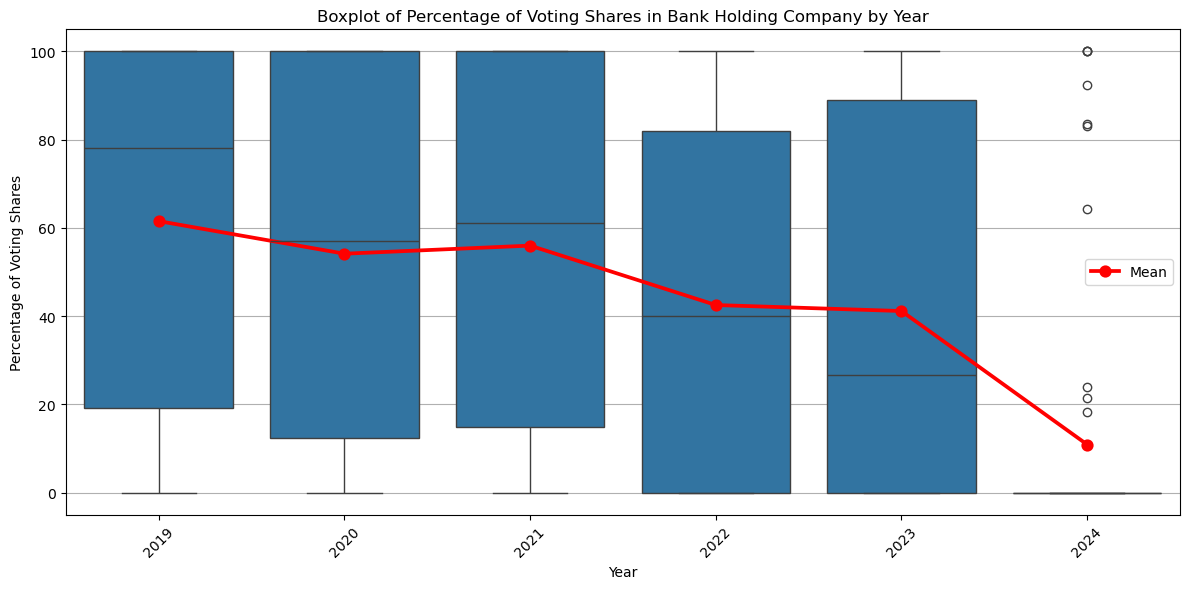

In [62]:
# Create a boxplot for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Percentage of Voting Shares in Bank Holding Company', data=summed_df)

# Add the mean for each year
mean_values = summed_df.groupby('Year')['Percentage of Voting Shares in Bank Holding Company'].mean().reset_index()
sns.pointplot(x='Year', y='Percentage of Voting Shares in Bank Holding Company', data=mean_values, color='red', markers='o', label='Mean', errorbar=None)
plt.legend()
plt.xticks(rotation=45)


plt.title('Boxplot of Percentage of Voting Shares in Bank Holding Company by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Voting Shares')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### _*Note that the boxplot will look strange for 2024 as we have little data from that year_

In [63]:
max_values

Year
2019    100.0
2020    100.0
2021    100.0
2022    100.0
2023    100.0
2024    100.0
Name: Percentage of Voting Shares in Bank Holding Company, dtype: float64

In [64]:
# Average the number of entries for each group
average_entries = grouped.size().reset_index(name='Count')
average_entries['Year'] = average_entries['Year'].astype(int)

# Make a fourth column that is the bank name and year combined
average_entries['Bank_Year'] = average_entries['Bank Name'] + ' - ' + average_entries['Year'].astype(str)

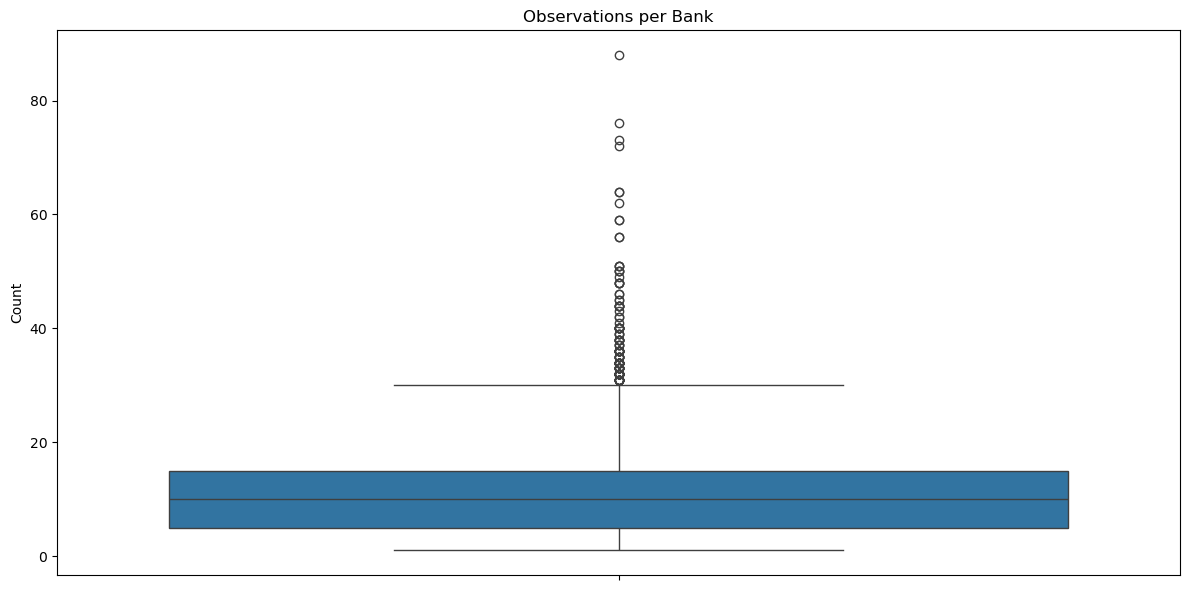

In [66]:
# Create a boxplot for the count variable
plt.figure(figsize=(12, 6))
sns.boxplot(y=average_entries['Count'])
plt.title("Observations per Bank")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [67]:
# For each bank, find the percentage of voting shares held by the ceo ('CEO', 'executive director', chief, executive officer', 'president')
ceo_titles = [
    'CEO', 'Chief Executive Officer', 'President', 'Executive Director'
]
# Filter the DataFrame for rows where the title contains any of the ceo_titles
ceo_df = df[df['Title and Position with Bank Holding Company'].str.contains('|'.join(ceo_titles), case=False, na=False)]

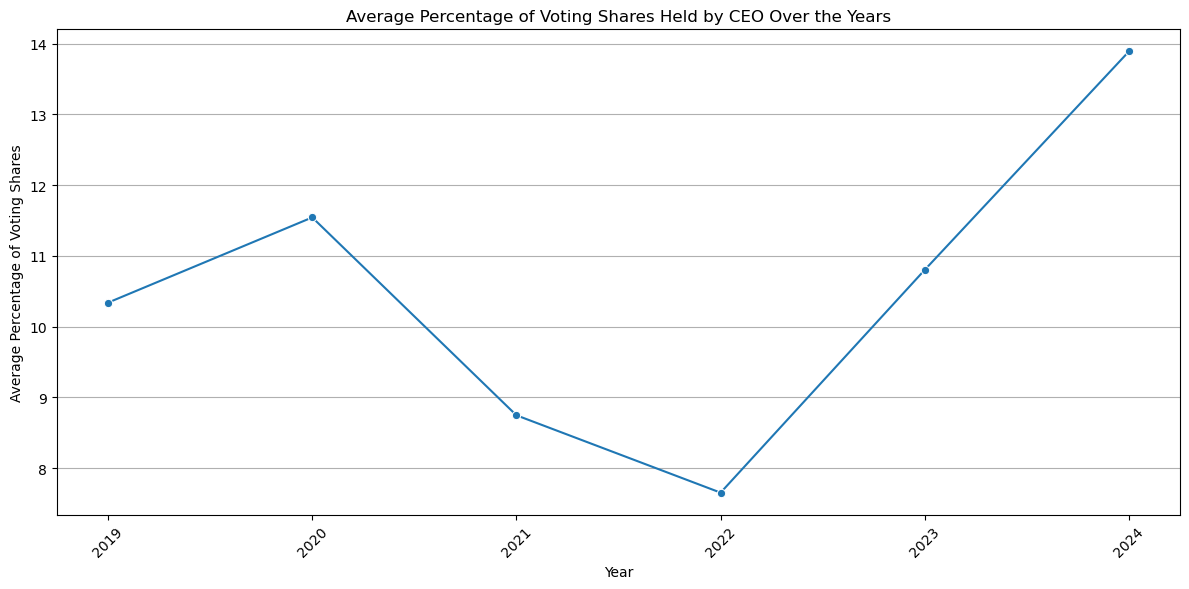

In [69]:
# Create a line plot for the average percentage of voting shares held by the ceo over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year',
             y='Percentage of Voting Shares in Bank Holding Company',
             data=ceo_df.groupby('Year')['Percentage of Voting Shares in Bank Holding Company'].mean().reset_index(),
             marker='o')
plt.title('Average Percentage of Voting Shares Held by CEO Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Percentage of Voting Shares')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [70]:
# Add a column for the total percentage of voting shares held by the ceo in the bank holding company reported
def get_ceo_percentage(row):
    if pd.isna(row['Percentage of Voting Shares in Bank Holding Company']):
        return 0.0
    return row['Percentage of Voting Shares in Bank Holding Company']

ceo_df = ceo_df.copy()
ceo_df['Total Percentage of Voting Shares Held by CEO'] = ceo_df.apply(get_ceo_percentage, axis=1)

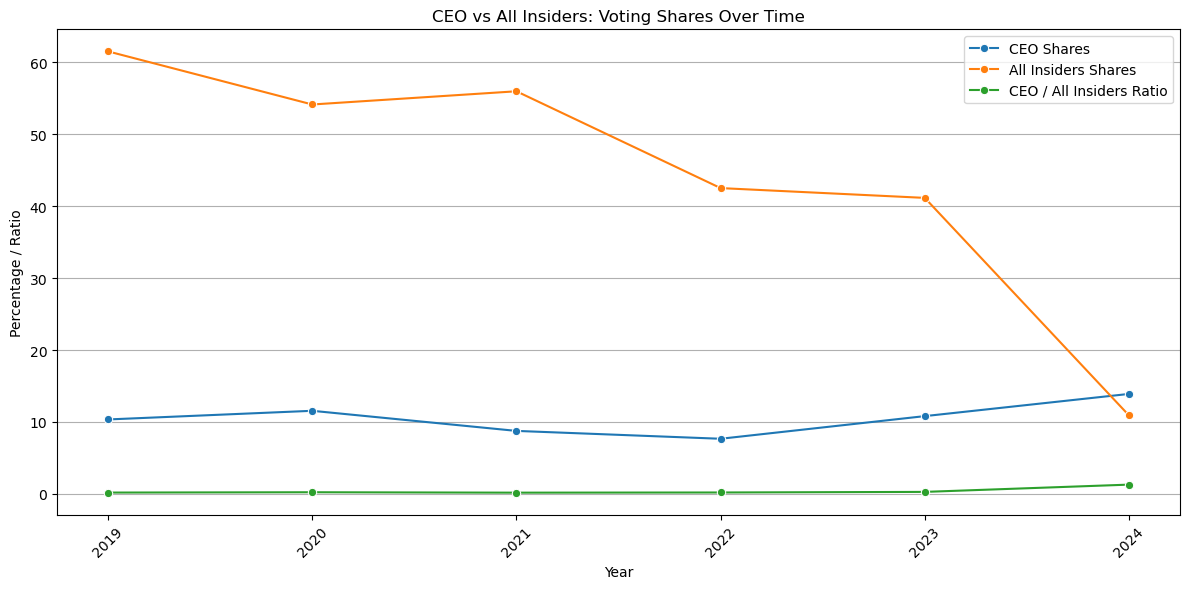

In [72]:
# Step 1: Group by year
ceo_by_year = ceo_df.groupby('Year')['Total Percentage of Voting Shares Held by CEO'].mean().reset_index()
insiders_by_year = summed_df.groupby('Year')['Percentage of Voting Shares in Bank Holding Company'].mean().reset_index()

# Step 2: Merge the two for ratio calculation
merged = pd.merge(ceo_by_year, insiders_by_year, on='Year', how='inner')

# Step 3: Calculate CEO / Insider share ratio
merged['CEO to Insider Share Ratio'] = merged['Total Percentage of Voting Shares Held by CEO'] / merged['Percentage of Voting Shares in Bank Holding Company']

# Step 4: Plot all three lines
plt.figure(figsize=(12, 6))

# CEO Shares
sns.lineplot(
    x='Year',
    y='Total Percentage of Voting Shares Held by CEO',
    data=ceo_by_year,
    marker='o',
    label='CEO Shares'
)

# All Insider Shares
sns.lineplot(
    x='Year',
    y='Percentage of Voting Shares in Bank Holding Company',
    data=insiders_by_year,
    marker='o',
    label='All Insiders Shares'
)

# CEO / Insider Ratio
sns.lineplot(
    x='Year',
    y='CEO to Insider Share Ratio',
    data=merged,
    marker='o',
    label='CEO / All Insiders Ratio'
)

# Formatting
plt.title('CEO vs All Insiders: Voting Shares Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage / Ratio')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

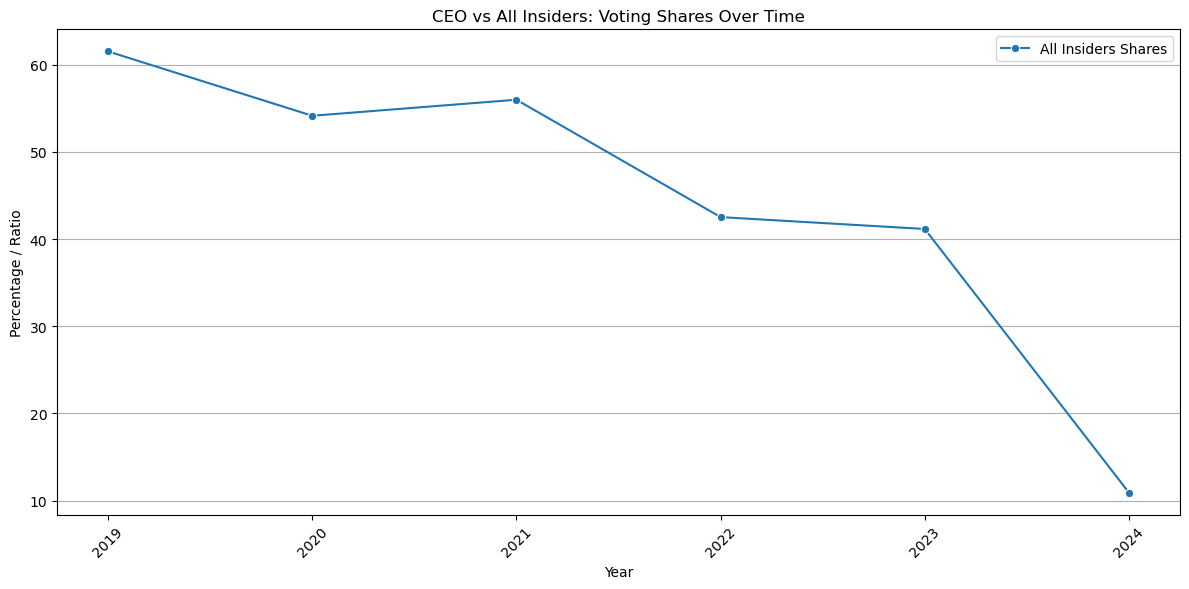

In [73]:
# Step 1: Group by year
ceo_by_year = ceo_df.groupby('Year')['Total Percentage of Voting Shares Held by CEO'].mean().reset_index()
insiders_by_year = summed_df.groupby('Year')['Percentage of Voting Shares in Bank Holding Company'].mean().reset_index()

# Step 4: Plot all three lines
plt.figure(figsize=(12, 6))


# All Insider Shares
sns.lineplot(
    x='Year',
    y='Percentage of Voting Shares in Bank Holding Company',
    data=insiders_by_year,
    marker='o',
    label='All Insiders Shares'
)


# Formatting
plt.title('CEO vs All Insiders: Voting Shares Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage / Ratio')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

Clean securities table

In [ ]:
# Load the data
data_types = {
    'Name and Address': str,
    'Country of Citizenship': str,
    'Number and Percentage of Voting Stock': str,
    'Bank Name': str,
    'table presence': str,
    'Bank_PDF-Name': str,
    'Year': str,
    'List names of other companies if 25% or more of voting securities are held': str,
    'Bank Name': str,
    'table presence': str,
    'Bank_PDF-Name': str,
    'Year': str,
}

#only load the columns that are needed (listed in data_types)
columns_to_load = list(data_types.keys())

# Load the CSV file with specified data types
df = pd.read_csv('/Users/nashlaturcios/Desktop/nash-fed-data/all_insiders_combined.csv', 
  dtype=data_types,
  usecols=columns_to_load)
